In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
customers.isnull().sum(), products.isnull().sum(), transactions.isnull().sum()

(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64)

In [7]:
customers.dtypes, products.dtypes, transactions.dtypes

(CustomerID      object
 CustomerName    object
 Region          object
 SignupDate      object
 dtype: object,
 ProductID       object
 ProductName     object
 Category        object
 Price          float64
 dtype: object,
 TransactionID       object
 CustomerID          object
 ProductID           object
 TransactionDate     object
 Quantity             int64
 TotalValue         float64
 Price              float64
 dtype: object)

In [8]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
customers['SignupYear'] = customers['SignupDate'].dt.year
transactions['TransactionYear'] = transactions['TransactionDate'].dt.year
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.month

C:\Users\KIIT\AppData\Local\Temp\ipykernel_2356\2151996794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2')


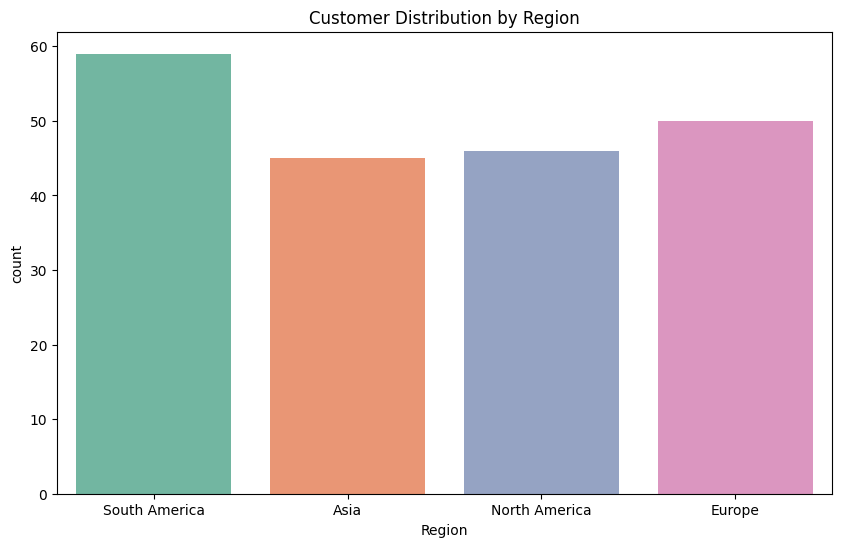

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Customer Distribution by Region')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_2356\1330454609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='SignupYear', palette='Set1')


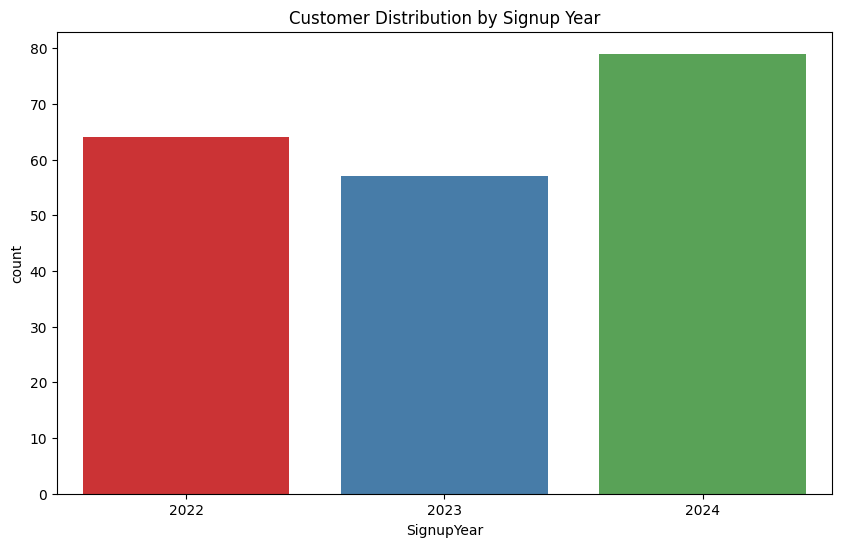

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='SignupYear', palette='Set1')
plt.title('Customer Distribution by Signup Year')
plt.show()

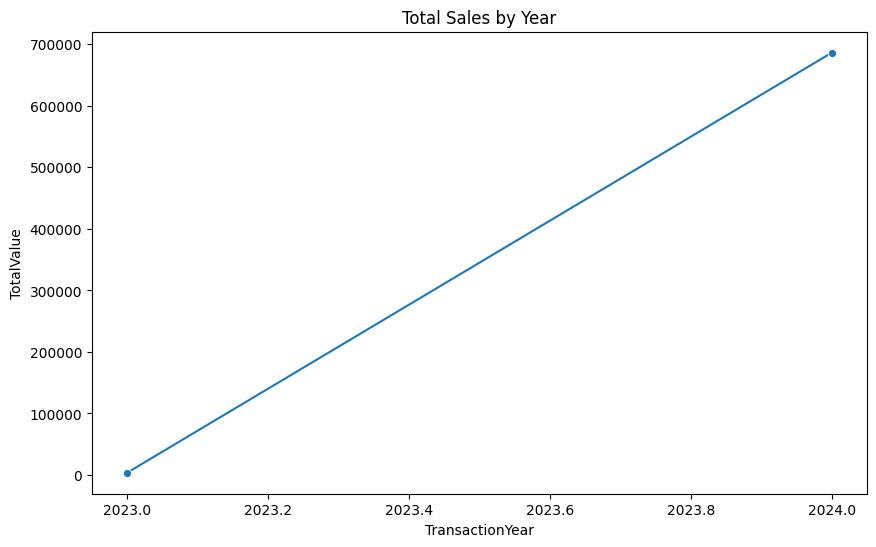

In [12]:
sales_by_year = transactions.groupby('TransactionYear')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='TransactionYear', y='TotalValue', data=sales_by_year, marker='o')
plt.title('Total Sales by Year')
plt.show()


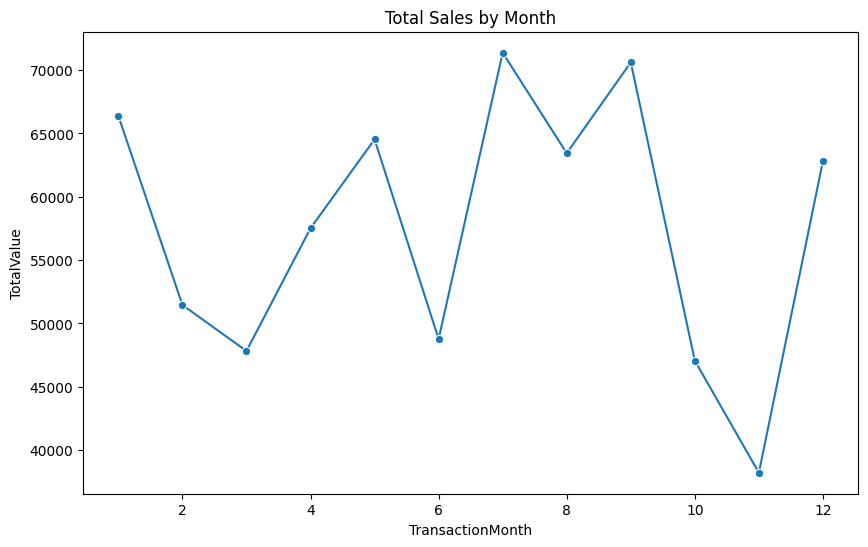

In [13]:
sales_by_month = transactions.groupby('TransactionMonth')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='TransactionMonth', y='TotalValue', data=sales_by_month, marker='o')
plt.title('Total Sales by Month')
plt.show()

In [14]:
category_sales = transactions.merge(products[['ProductID', 'Category']], on='ProductID', how='left')
category_sales = category_sales.groupby('Category')['TotalValue'].sum().reset_index()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_2356\2986576583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='Category', data=category_sales, palette='viridis')


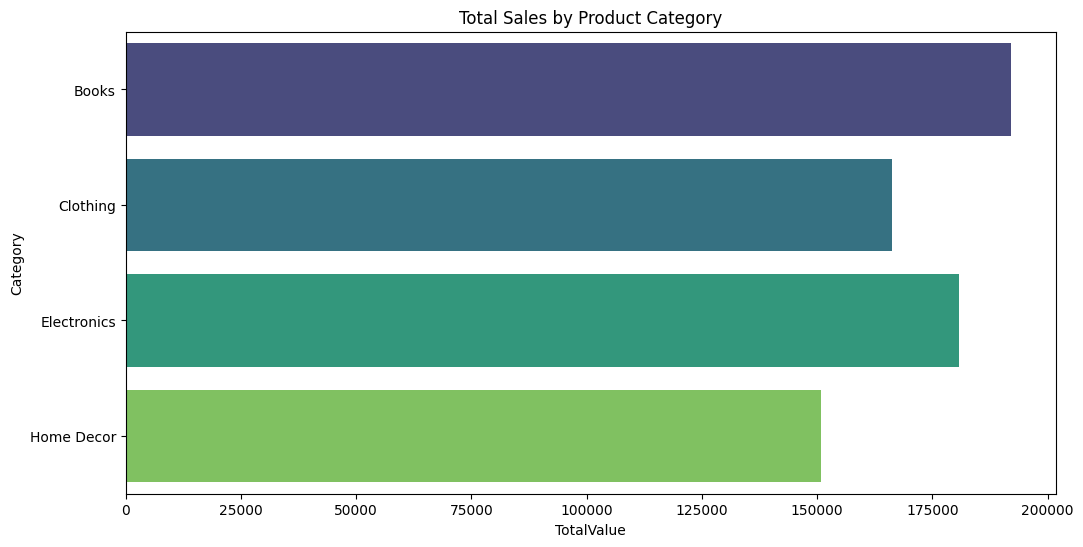

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalValue', y='Category', data=category_sales, palette='viridis')
plt.title('Total Sales by Product Category')
plt.show()

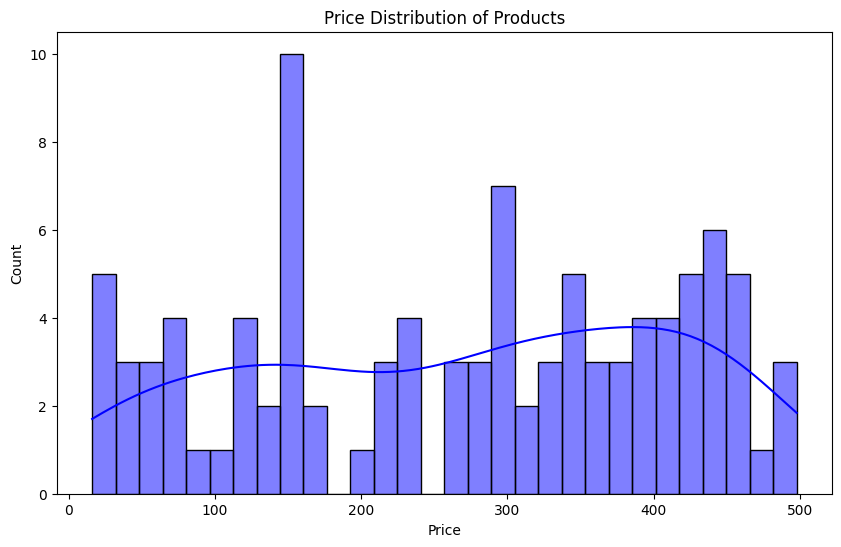

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution of Products')
plt.show()

In [17]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_customers = customer_spending.nlargest(10, 'TotalValue')

In [18]:
top_customers = top_customers.merge(customers[['CustomerID', 'CustomerName']], on='CustomerID', how='left')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_2356\3646795829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='CustomerName', data=top_customers, palette='Blues_d')


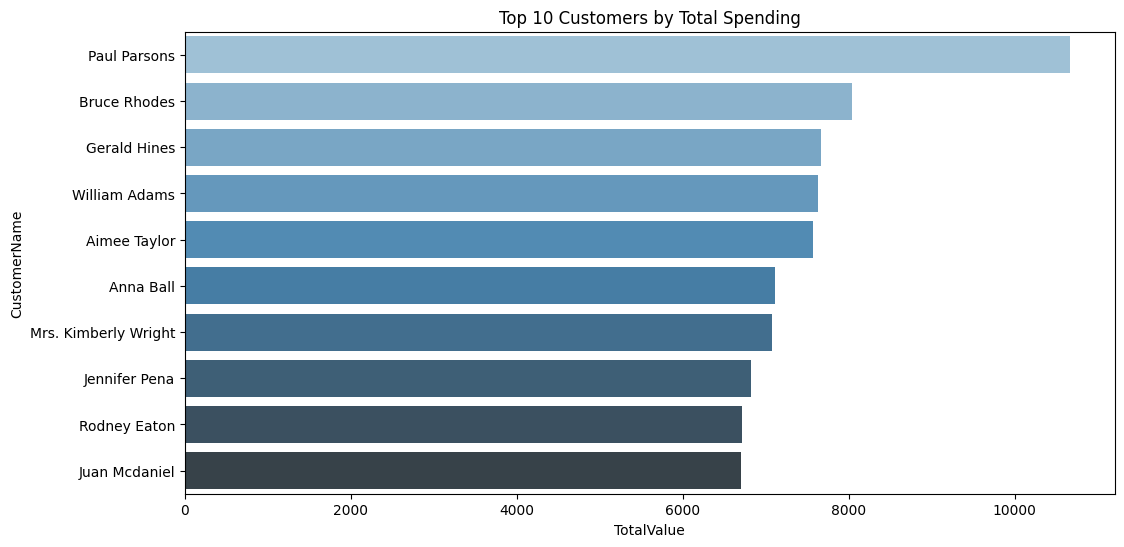

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalValue', y='CustomerName', data=top_customers, palette='Blues_d')
plt.title('Top 10 Customers by Total Spending')
plt.show()